In [1]:
#basics
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
original_train_df = pd.read_csv('train.csv', index_col='Id')
original_test_df = pd.read_csv('test.csv', index_col='Id')

# reserved for pipeline
pipe_data = original_train_df.copy()
pipe_test = original_test_df.copy()

# use for preliminary analysis
train_df = original_train_df.copy()
test_df = original_test_df.copy()


In [4]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
#numerical feature descriptive statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
train_df.describe(include='object').T.sort_values(by=['unique'], ascending=False)

,count,unique,top,freq
Neighborhood,1460,25,NAmes,225
Exterior2nd,1460,16,VinylSd,504
Exterior1st,1460,15,VinylSd,515
SaleType,1460,9,WD,1267
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445
HouseStyle,1460,8,1Story,726
RoofMatl,1460,8,CompShg,1434
Functional,1460,7,Typ,1360
BsmtFinType2,1422,6,Unf,1256


In [7]:
missing = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))
missing.columns = ["count"]
missing = missing.loc[(missing!=0).any(axis=1)]
missing["percent"] = missing[0:] / 1460
missing.style.background_gradient('cool')

,count,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [8]:
#Group features for preprocessing purpose
categorical_features = [feature for feature in train_df.columns if
                    train_df[feature].dtype == "object"] 

#from data set description
nominal_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", 
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                    "CentralAir", 'Electrical',"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

ordinal_features = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']



numerical_features = [feature for feature in train_df.columns if feature not in categorical_features + ['SalePrice']]

discrete_numerical_features = [ 'OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath',
 'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold', "MSSubClass"] 

continuous_numerical_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
                                 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                 'MiscVal','YrSold']

#Just checking if any little feature left behind
assert categorical_features.sort() == (nominal_features + ordinal_features).sort()
assert numerical_features.sort() == (discrete_numerical_features + continuous_numerical_features).sort()

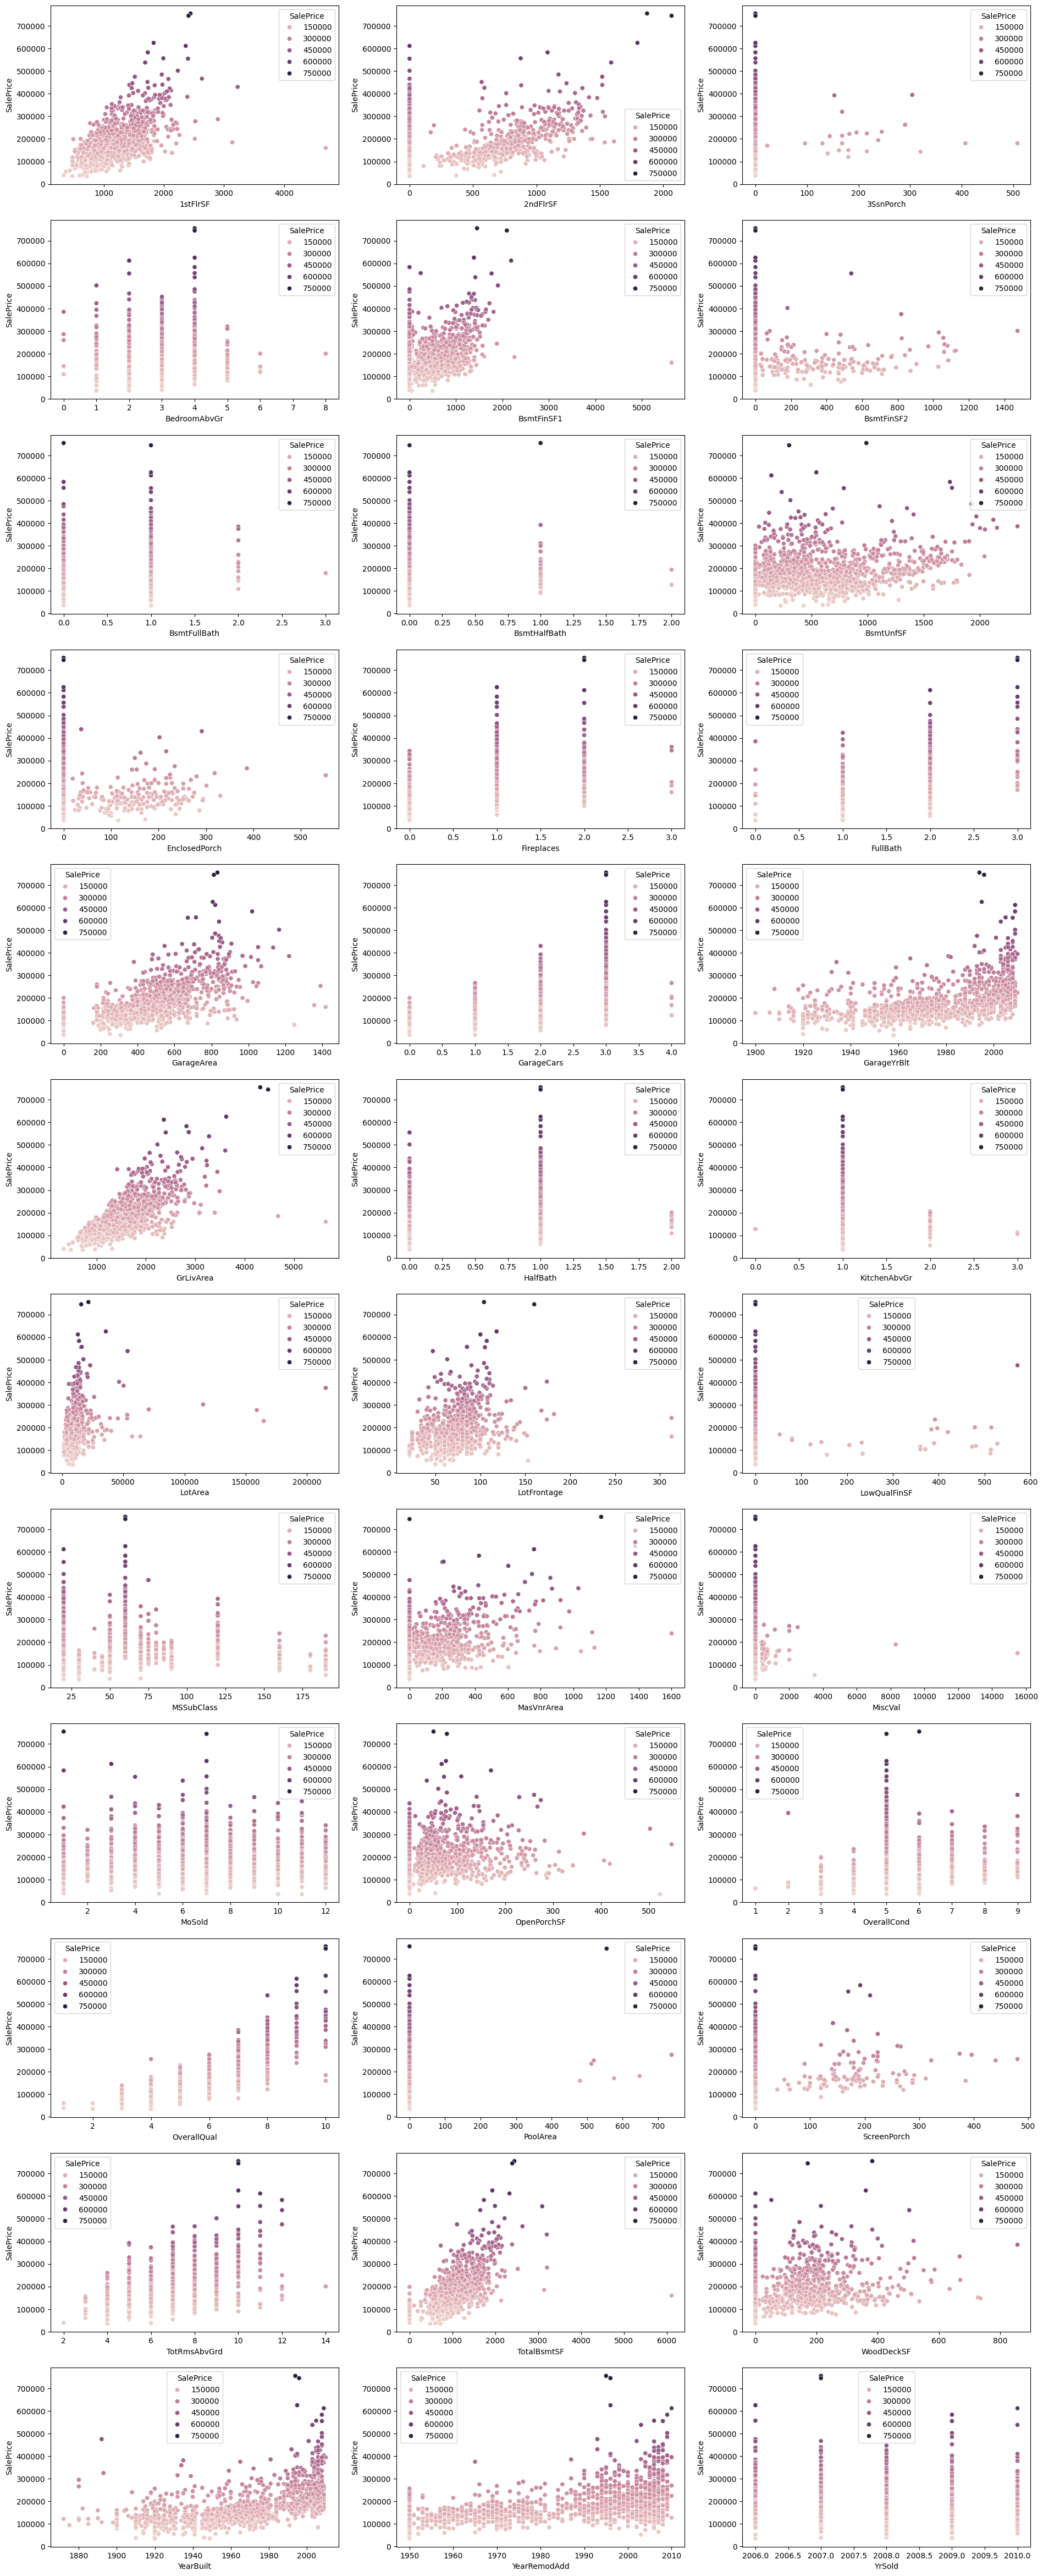

In [9]:
fig, ax = plt.subplots(12, 3, figsize=(23, 60))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice',  data=train_df, ax=subplot, hue = 'SalePrice' )

In [10]:
#Drop outliners
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1200)
                                  & (train_df['SalePrice'] < 300000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)

train_df = train_df.drop(train_df[(train_df['TotRmsAbvGrd'] > 12)
                                  & (train_df['SalePrice'] < 230000)].index)
y = train_df.SalePrice

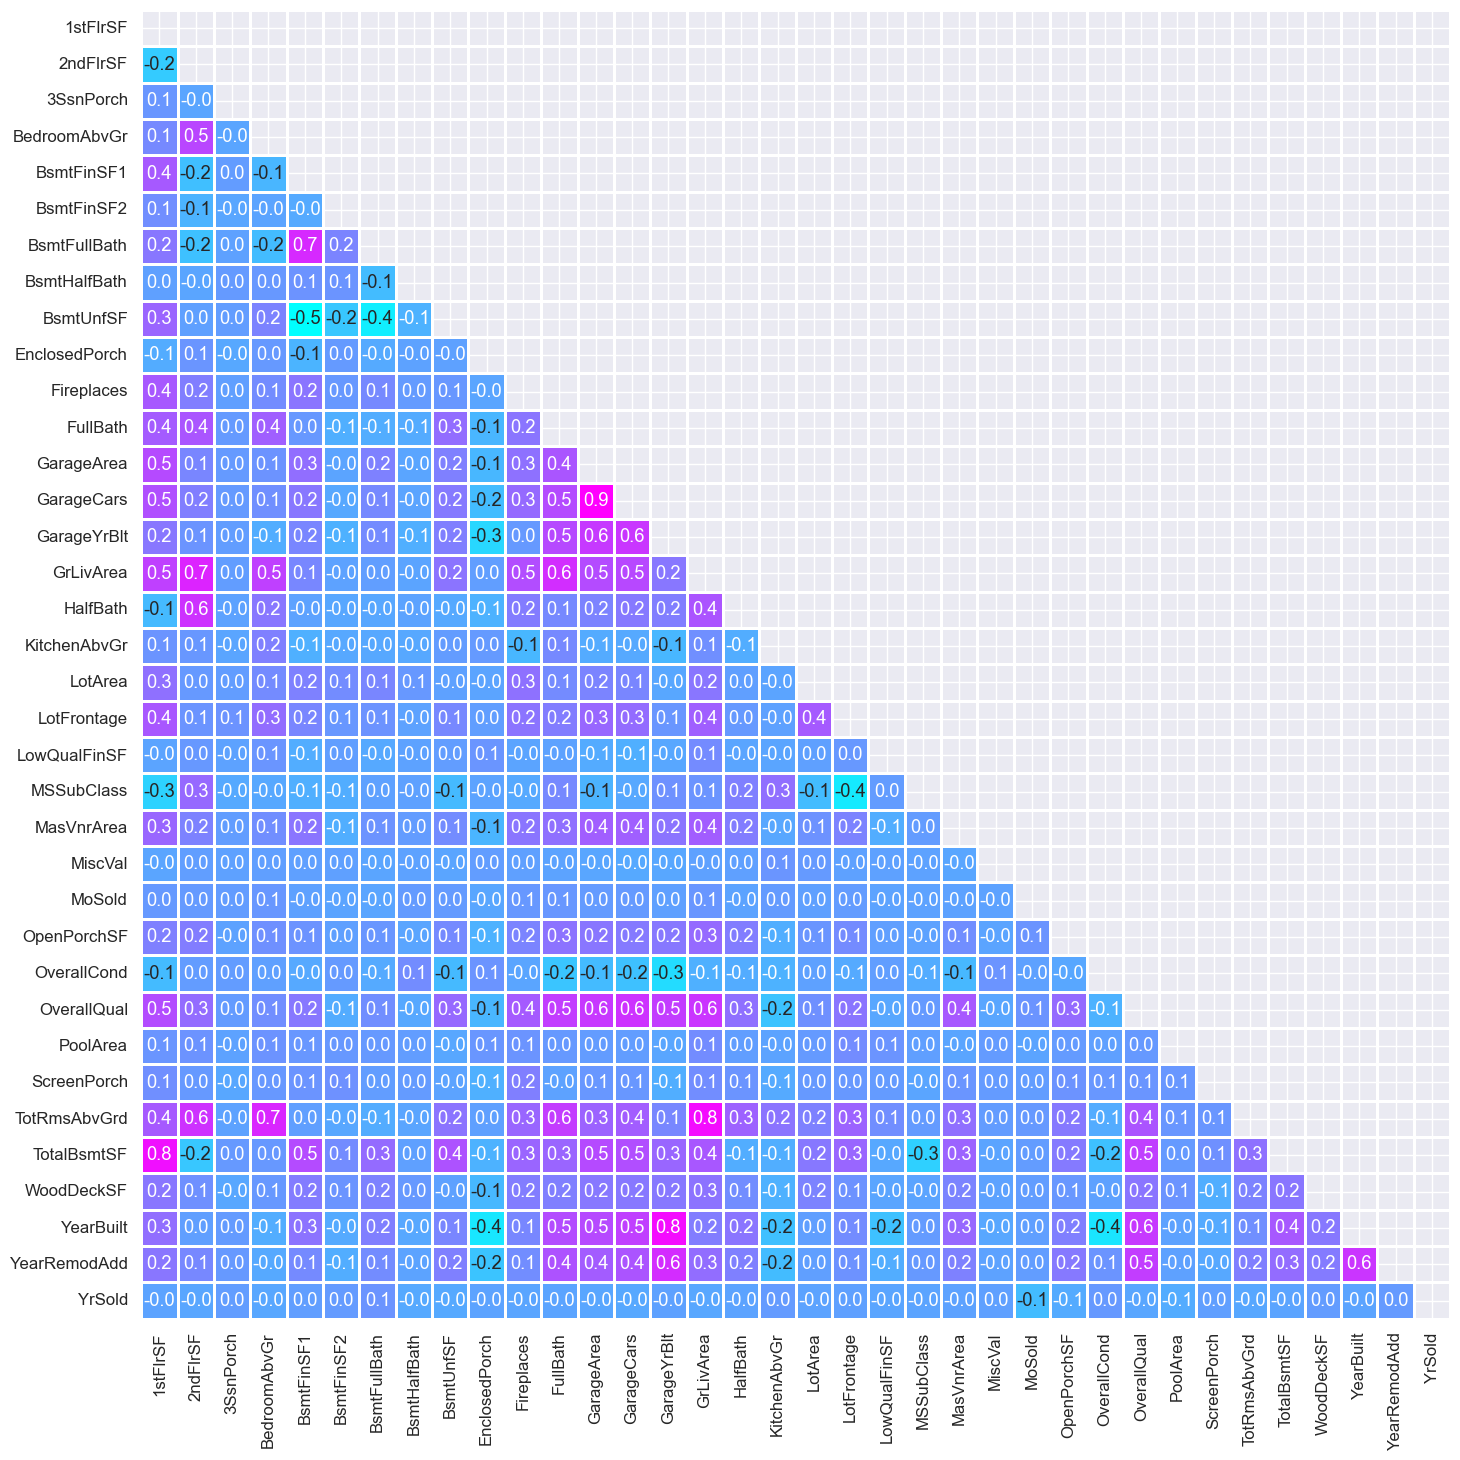

In [15]:
# Display correlations between numerical features and saleprice on heatmap.

sns.set(font_scale=1.1)
correlation_train = train_df[numerical_features].corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='cool',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False);

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
mutual_df = train_df[numerical_features]

mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] ).style.background_gradient("cool")

,Numerical_Feature_MI
OverallQual,0.570008
GrLivArea,0.489854
YearBuilt,0.381473
TotalBsmtSF,0.373381
GarageArea,0.373311
GarageCars,0.356887
1stFlrSF,0.312625
MSSubClass,0.281722
GarageYrBlt,0.260069
YearRemodAdd,0.255544


In [19]:
mutual_df_categorical = train_df[categorical_features]
#categorical features must be encoded to get mutual information
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
mutual_info = mutual_info_regression(mutual_df_categorical.fillna("Do_not_have_feature"), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

,Categorical_Feature_MI
Neighborhood,0.501523
ExterQual,0.335960
BsmtQual,0.332460
KitchenQual,0.330217
GarageFinish,0.263382
FireplaceQu,0.215813
GarageType,0.209170
Foundation,0.203483
HeatingQC,0.176784
Exterior2nd,0.163486


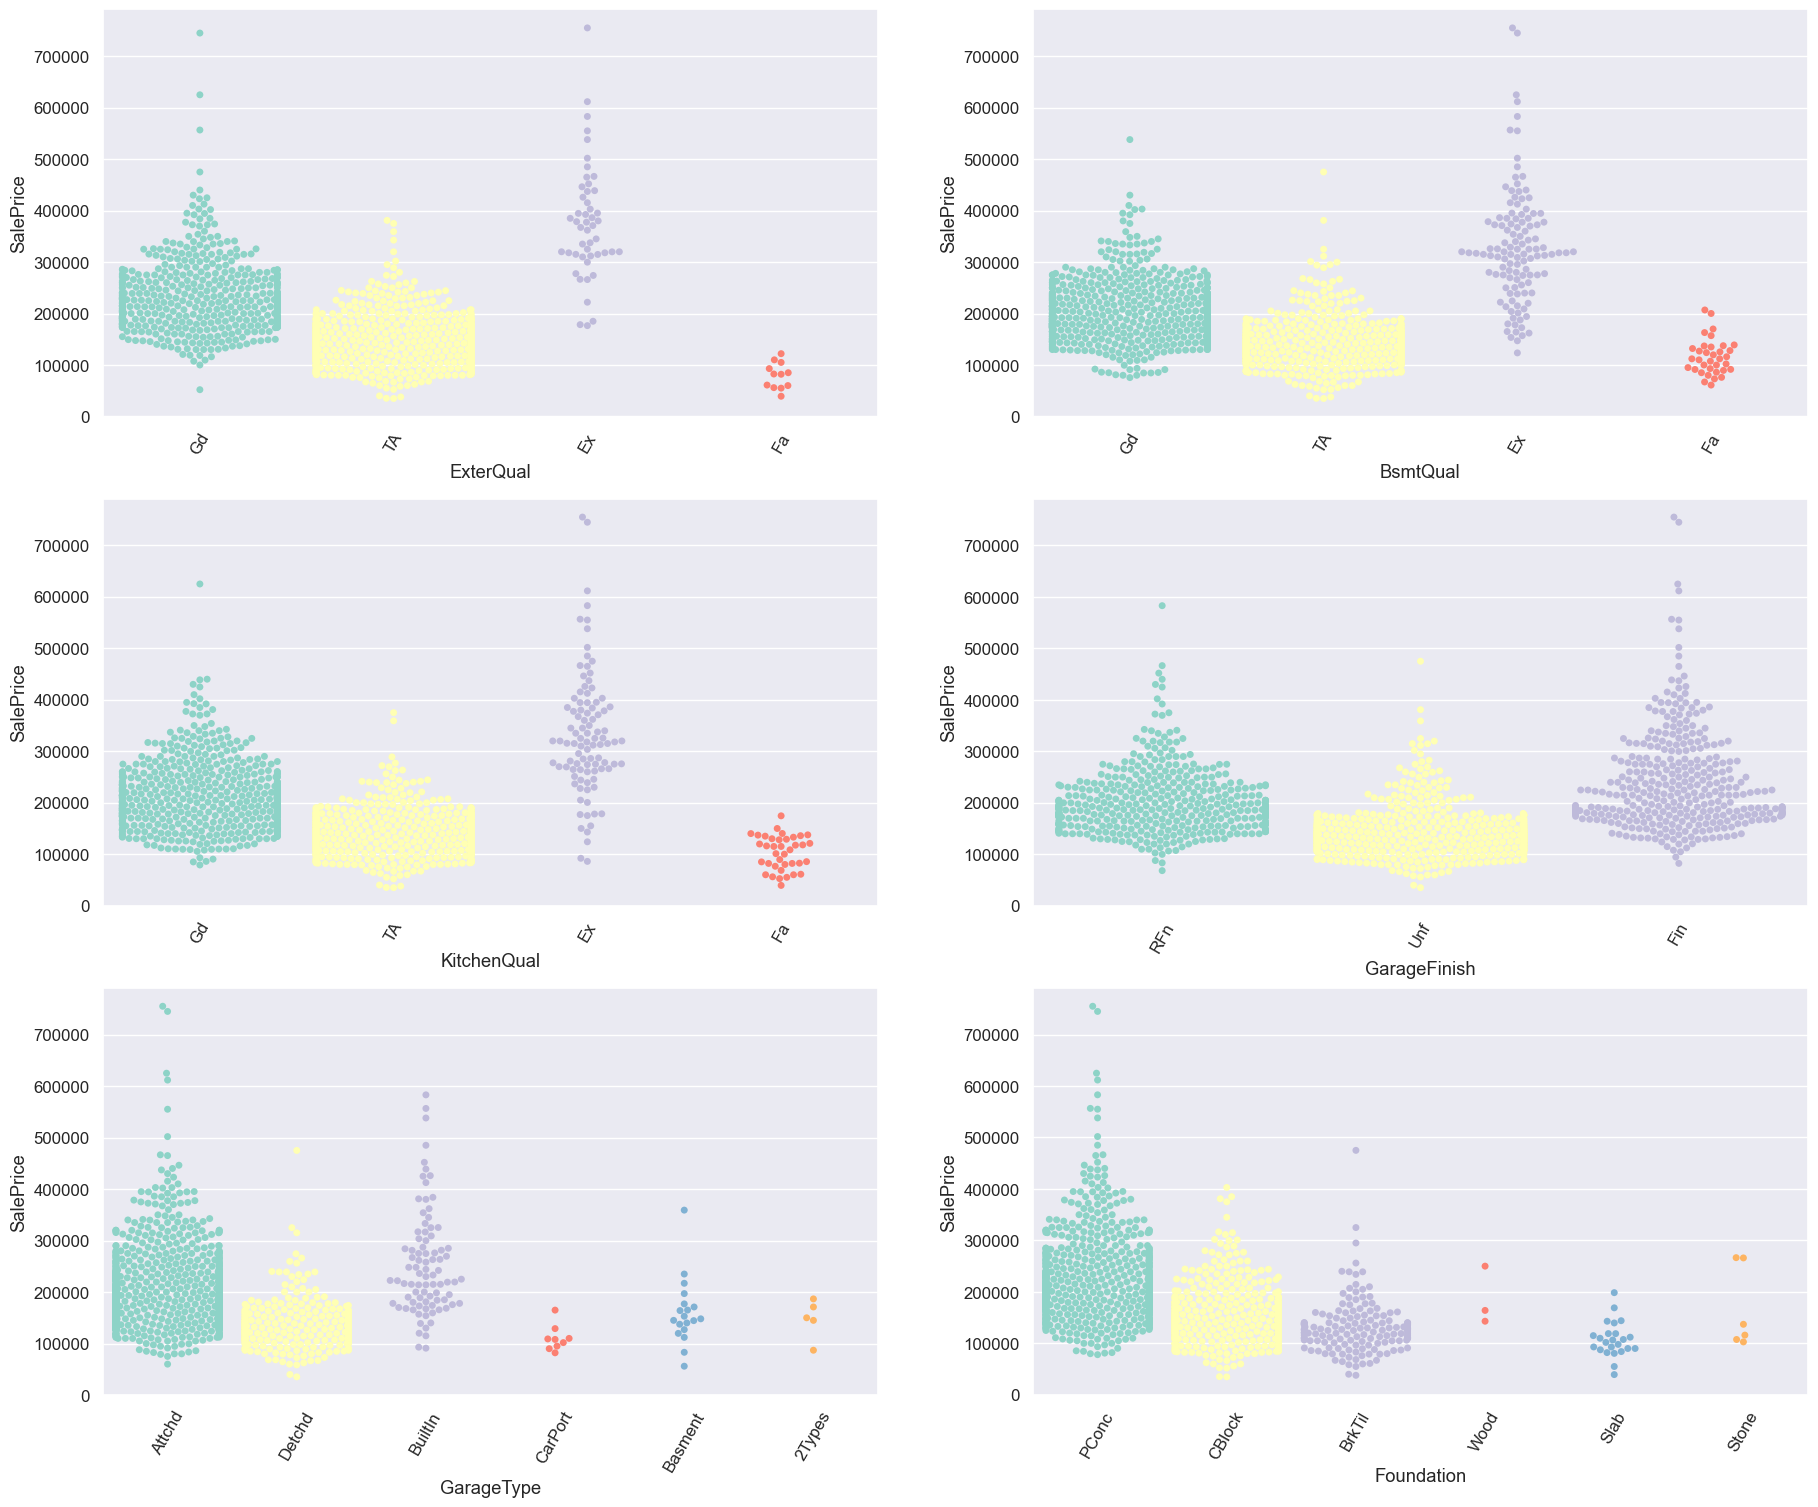

In [20]:
categorical_champions = ["ExterQual", "BsmtQual", "KitchenQual", "GarageFinish", "GarageType","Foundation"]    



fig, ax = plt.subplots(3, 2, figsize=(22, 18))
for var, subplot in zip(categorical_champions, ax.flatten()):    
    sns.swarmplot(x=var, y='SalePrice', data=train_df, ax=subplot, palette='Set3')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=60)
    

**_Preprocessing_**

In [59]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
import category_encoders as ce


In [23]:
# Preprocessing for numerical data

numerical_transformer = Pipeline(steps=[
    
    ('imputer', SimpleImputer(strategy='constant', fill_value = 0))
])
# Preprocessing for categorical data
nominal_transformer = Pipeline(steps=[
    
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'Do_not_have_this_feature')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [24]:
GarageQual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
Fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}
GarageFinish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
KitchenQual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
GarageCond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
HeatingQC_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ExterQual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
BsmtCond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
LandSlope_map = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
ExterCond_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
BsmtExposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
PavedDrive_map = {'Y': 2, 'P': 1, 'N': 0}
BsmtQual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
LotShape_map = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
BsmtFinType2_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
BsmtFinType1_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
FireplaceQu_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
Utilities_map = {"AllPub":3, "NoSewr":2, "NoSeWa":1,  "ELO":0}
Functional_map = {'Typ': 7,'Min1': 6,'Min2': 5,'Mod': 4,'Maj1': 3,'Maj2': 2, 'Sev': 1 , 'Sal': 0}
PoolQC_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

In [25]:
ordinal_mapping = [{'col': col, 'mapping': globals()[col + '_map']} 
                    for col in ordinal_features]

In [27]:
ordinal_transformer = ce.OrdinalEncoder(mapping = ordinal_mapping)

In [28]:
ordinal_transformer = Pipeline(steps=[
    

    ('ordinal_encoder', ce.OrdinalEncoder(mapping = ordinal_mapping))
])

In [31]:
from sklearn import set_config

In [32]:
# Bundle preprocessing for tree-based algorithms
tree_preprocessor = ColumnTransformer(remainder=numerical_transformer,
    transformers=[

        
        ('nominal_transformer', nominal_transformer, nominal_features),
        ('ordinal_transformer', ordinal_transformer, ordinal_features),
        
            
    ])


set_config(display="diagram")
tree_preprocessor

ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(fill_value=0,
                                                           strategy='constant'))]),
                  transformers=[('nominal_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Do_not_have_this_feature',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'Street', 'Alley', 'LandContour',
                                  'LotConfig'...
dtype: int64},
                                                                          {'col': 'Fence',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                 ['LotShape', 'Utilities', 'LandSlope',
                                  'ExterQual', 'ExterCond', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive',
                                  'PoolQC', 'Fence'])])

In [34]:
# Preprocessing for numerical data
numerical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('Scaller', StandardScaler()),    
     
    
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'Do_not_have_this_feature')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
skew_features = train_df.select_dtypes(exclude=['object']).skew().sort_values(ascending=False)
skew_features = pd.DataFrame({'Skew' : skew_features})
skew_features.style.background_gradient('rocket')

,Skew
MiscVal,24.455241
PoolArea,15.926839
LotArea,12.628557
3SsnPorch,10.282620
LowQualFinSF,9.249359
KitchenAbvGr,4.518137
BsmtFinSF2,4.245246
ScreenPorch,4.112351
BsmtHalfBath,4.093529
EnclosedPorch,3.081741


In [36]:
#Kept limited with continuous features
skewed_features = [
'MiscVal',  'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch',
 'EnclosedPorch','Lot_occupation','MasVnrArea','OpenPorchSF',
    'Area_Qual_Cond_Indicator','LotFrontage','WoodDeckSF','Area_Quality_Indicator','Outside_live_area']

In [38]:
skewness_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('PowerTransformer', PowerTransformer( method='yeo-johnson', standardize=True)),      
])

In [39]:
# Bundle preprocessing for linear algorithms and SVR
linear_preprocessor = ColumnTransformer(remainder=numerical_transformer2,
    transformers=[
        ('skewness_transformer', skewness_transformer, skewed_features),
        ('nominal_transformer', nominal_transformer, nominal_features),
        ('ordinal_transformer', ordinal_transformer, ordinal_features),

    ])

linear_preprocessor

ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(fill_value=0,
                                                           strategy='constant')),
                                            ('Scaller', StandardScaler())]),
                  transformers=[('skewness_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('PowerTransformer',
                                                  PowerTransformer())]),
                                 ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch',
                                  'LowQualFinSF',...
dtype: int64},
                                                                          {'col': 'Fence',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                 ['LotShape', 'Utilities', 'LandSlope',
                                  'ExterQual', 'ExterCond', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive',
                                  'PoolQC', 'Fence'])])

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
class FeatureCreator1(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):
        
        self.add_attributes = add_attributes
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        
        if self.add_attributes:
            X_copy = X.copy()
            X_copy["Lack_of_feature_index"] = X_copy[["Street", "Alley", "MasVnrType", "GarageType", "MiscFeature",  'BsmtQual',
                                              'FireplaceQu','PoolQC','Fence']].isnull().sum(axis=1) + (X_copy["MasVnrType"] == 'None')+ (X_copy["CentralAir"] == 'No')
            X_copy["MiscFeatureExtended"] = (X_copy["PoolQC"].notnull()*1 + X_copy["MiscFeature"].notnull()*1+ X_copy["Fence"].notnull()*1).astype('int64')
            X_copy["Has_Alley"] = X_copy["Alley"].notnull().astype('int64')
            X_copy["Lot_occupation"] = X_copy["GrLivArea"]  / X_copy["LotArea"]
            X_copy["Number_of_floors"] = (X_copy["TotalBsmtSF"] != 0).astype('int64') + (X_copy["1stFlrSF"] != 0).astype('int64') + (X_copy["2ndFlrSF"] != 0).astype('int64')
            X_copy['Total_Close_Live_Area'] = X_copy['GrLivArea'] + X_copy['TotalBsmtSF'] 
            X_copy['Outside_live_area'] =  X_copy['WoodDeckSF'] + X_copy['OpenPorchSF'] + X_copy['EnclosedPorch']+ X_copy['3SsnPorch'] + X_copy['ScreenPorch']
            X_copy['Total_usable_area'] = X_copy['Total_Close_Live_Area'] + X_copy['Outside_live_area']
            X_copy['Area_Quality_Indicator'] = X_copy['Total_usable_area'] * X_copy['OverallQual']
            X_copy['Area_Qual_Cond_Indicator'] = X_copy['Total_usable_area'] * X_copy['OverallQual']* X_copy['OverallCond']
            X_copy['TotalBath'] = (X_copy['FullBath'] + (0.5 * X_copy['HalfBath']) + X_copy['BsmtFullBath'] + (0.5 * X_copy['BsmtHalfBath']))
            X_copy["Has_garage"] = X_copy["GarageYrBlt"].notnull().astype('int64')
            X_copy['House_Age'] = X_copy['YrSold'] - X_copy['YearBuilt']
            X_copy["Is_Remodeled"] = (X_copy["YearBuilt"] != X_copy["YearRemodAdd"]).astype('int64')
            X_copy['HasBsmt'] = X_copy['BsmtQual'].notnull().astype('int64')
            X_copy['Quality_conditition'] = X_copy['OverallQual']* X_copy['OverallCond']
            X_copy['Quality_conditition_2'] = X_copy['OverallQual'] + X_copy['OverallCond']
            X_copy['House_Age2'] = X_copy['YrSold'] - X_copy['YearRemodAdd']
            X_copy['Quality_conditition'] = X_copy['OverallQual']* X_copy['OverallCond']
            X_copy['Quality_conditition_2'] = X_copy['OverallQual'] + X_copy['OverallCond']
            X_copy['House_Age2'] = X_copy['YrSold'] - X_copy['YearRemodAdd']
            return X_copy
        else:
            return X_copy

In [50]:
Creator1 = FeatureCreator1(add_attributes = True)

In [47]:
from xgboost import XGBRegressor

In [49]:
pipe_xgb = Pipeline(steps=[
                        ('Creator1', Creator1),
                       ('tree_preprocessor', tree_preprocessor),
                      ('regressor1', XGBRegressor(random_state =1)),
                     ])
pipe_xgb

Pipeline(steps=[('Creator1', FeatureCreator1()),
                ('tree_preprocessor',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(fill_value=0,
                                                                            strategy='constant'))]),
                                   transformers=[('nominal_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Do_not_have_this_feature',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [58]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge

In [54]:
pipe_Lasso = Pipeline(steps=[
                       ('Creator1', Creator1),
                       ('linear_preprocessor', linear_preprocessor),
                      ('regressor2', Lasso()),
                     ])

TargetTransformedLasso = TransformedTargetRegressor(regressor=pipe_Lasso, func=np.log1p, inverse_func=np.expm1)
TargetTransformedLasso

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('Creator1',
                                                      FeatureCreator1()),
                                                     ('linear_preprocessor',
                                                      ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 strategy='constant')),
                                                                                                  ('Scaller',
                                                                                                   StandardScaler())]),
                                                                        transformers=[('skewness_transformer',
                                                                                       Pipeline(steps=[('impu...
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                                                                       ['LotShape',
                                                                                        'Utilities',
                                                                                        'LandSlope',
                                                                                        'ExterQual',
                                                                                        'ExterCond',
                                                                                        'BsmtQual',
                                                                                        'BsmtCond',
                                                                                        'BsmtExposure',
                                                                                        'BsmtFinType1',
                                                                                        'BsmtFinType2',
                                                                                        'HeatingQC',
                                                                                        'KitchenQual',
                                                                                        'Functional',
                                                                                        'FireplaceQu',
                                                                                        'GarageFinish',
                                                                                        'GarageQual',
                                                                                        'GarageCond',
                                                                                        'PavedDrive',
                                                                                        'PoolQC',
                                                                                        'Fence'])])),
                                                     ('regressor2', Lasso())]))

In [55]:
#Drop outliers
pipe_data = pipe_data.drop(pipe_data[(pipe_data['GrLivArea'] > 4000)
                                 & (pipe_data['SalePrice'] < 200000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['GarageArea'] > 1200)
                                & (pipe_data['SalePrice'] < 300000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['TotalBsmtSF'] > 4000)
                               & (pipe_data['SalePrice'] < 200000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['1stFlrSF'] > 4000)
                                  & (pipe_data['SalePrice'] < 200000)].index)

pipe_data = pipe_data.drop(pipe_data[(pipe_data['TotRmsAbvGrd'] > 12)
                                  & (pipe_data['SalePrice'] < 230000)].index)

y = pipe_data.SalePrice
pipe_data = pipe_data.drop("SalePrice", axis=1)

In [56]:
### Update feature lists
categorical_features = [feature for feature in pipe_data.columns if
                    pipe_data[feature].dtype == "object"]


ordinal_features = [ 'LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
                    'GarageCond','PavedDrive','PoolQC','Fence']




nominal_features = list(set(categorical_features) - set(ordinal_features)) 


numerical_features = list(set(pipe_data.columns) - set(categorical_features)) 

In [57]:
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_validate,GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

In [62]:
def objective(trial):

    max_iter = trial.suggest_int("max_iter", 1000, 4000)
    alpha =  trial.suggest_float("alpha", 1e-4, 1000, log=True) 
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0, step=0.05)
    tol =  trial.suggest_float("tol", 1e-6, 1e-3, log=True)

    
    
    ElasticNet_regressor = ElasticNet(max_iter=max_iter, alpha=alpha,tol=tol, l1_ratio=l1_ratio, random_state =1)
   
    # -- Make a pipeline
    ElasticNet_pipeline = make_pipeline(Creator1,linear_preprocessor, ElasticNet_regressor)
    
    ElasticNet_model = TransformedTargetRegressor(regressor=ElasticNet_pipeline, func=np.log1p, inverse_func=np.expm1)
    
    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
    score = cross_val_score(ElasticNet_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
    score = score.mean()
    return score


sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2024-01-26 14:24:47,778] A new study created in memory with name: no-name-28735f93-7bda-42cb-b16f-2c1405e2865c
[I 2024-01-26 14:24:48,348] Trial 0 finished with value: 55030.748732463035 and parameters: {'max_iter': 2123, 'alpha': 451.85609510240965, 'l1_ratio': 0.75, 'tol': 6.251373574521755e-05}. Best is trial 0 with value: 55030.748732463035.
[I 2024-01-26 14:24:50,007] Trial 1 finished with value: 12830.799975921378 and parameters: {'max_iter': 1468, 'alpha': 0.0012358382772306934, 'l1_ratio': 0.05, 'tol': 0.0003967605077052988}. Best is trial 1 with value: 12830.799975921378.
[I 2024-01-26 14:24:53,181] Trial 2 finished with value: 24859.12477105793 and parameters: {'max_iter': 2803, 'alpha': 9.047071957568372, 'l1_ratio': 0.0, 'tol': 0.0008123245085588687}. Best is trial 1 with value: 12830.799975921378.
[I 2024-01-26 14:24:54,466] Trial 3 finished with value: 12886.765047782597 and parameters: {'max_iter': 3498, 'alpha': 0.003064599841241145, 'l1_ratio': 0.15000000000000002, 

In [74]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [72]:
xgb_tunned = XGBRegressor(n_estimators = 6500,
                          alpha = 1.7938525031017074e-09,
                          subsample = 0.3231512729662032,
                          colsample_bytree = 0.25528017285233484,
                          max_depth = 5, 
                          min_child_weight = 2, 
                          learning_rate = 0.004828231865923587, 
                          gamma = 0.0026151163125498213,
                          random_state =1)

pipe_xgb = Pipeline(steps=[
                        
                       ('tree_preprocessor', tree_preprocessor),
                       ('regressor1', xgb_tunned),
                     ])



gbm_tunned = GradientBoostingRegressor(n_estimators= 5500,
                                       max_depth=5,
                                       min_samples_leaf=14,
                                       learning_rate=0.006328507206504974, 
                                       subsample=0.9170443266552768,
                                       max_features='sqrt', 
                                       random_state=1)


pipe_gbm = Pipeline(steps=[
                       
                       ('tree_preprocessor', tree_preprocessor),
                      ('regressor2', gbm_tunned),
                     ])

lgbm_tunned = LGBMRegressor(n_estimators =7000,
                            max_depth = 7,
                            learning_rate =0.002536841439596437,
                            min_data_in_leaf =22, 
                            subsample= 0.7207500503954922, 
                            max_bin =210 ,
                            feature_fraction = 0.30010067215105635, 
                            random_state =1,
                            verbosity= -1)

pipe_lgbm = Pipeline(steps=[
                       
                       ('tree_preprocessor', tree_preprocessor),
                      ('regressor3', lgbm_tunned),
                     ])

catboost_tunned = CatBoostRegressor(iterations = 4500,
                                    colsample_bylevel =0.05367479984702603,
                                    learning_rate = 0.018477566955501026,random_strength = 0.1321272840705348,
                                    depth = 6,
                                    l2_leaf_reg = 4,
                                    boosting_type = 'Plain',
                                    bootstrap_type = 'Bernoulli', 
                                    subsample = 0.7629052520889268, 
                                    logging_level = 'Silent', 
                                    random_state =1)

pipe_catboost = Pipeline(steps=[
                       ('tree_preprocessor', tree_preprocessor),
                      ('regressor4', catboost_tunned),
                     ])



elasticnet_tunned = ElasticNet(max_iter= 3993,
                               alpha = 0.0007824887724782356,
                               l1_ratio= 0.25, 
                               tol = 3.78681184748232e-06, 
                               random_state= 1)

pipe_Elasticnet = Pipeline(steps=[
                       
                       ('linear_preprocessor', linear_preprocessor),
                      ('regressor5', elasticnet_tunned),
                     ])

TargetTransformedElasticnet = TransformedTargetRegressor(regressor=pipe_Elasticnet, func=np.log1p, inverse_func=np.expm1)


lasso_tunned = Lasso(max_iter= 2345,
                     alpha =0.00019885959230548468,
                     tol = 2.955506894549702e-05, 
                     random_state= 1)

pipe_Lasso = Pipeline(steps=[
                       
                       ('linear_preprocessor', linear_preprocessor),
                      ('regressor6', lasso_tunned),
                     ])


TargetTransformedLasso = TransformedTargetRegressor(regressor=pipe_Lasso, func=np.log1p, inverse_func=np.expm1)


ridge_tunned = Ridge(max_iter= 1537, 
                     alpha = 6.654338887411367,
                     tol = 8.936831872581897e-05, 
                     random_state= 1)

pipe_Ridge = Pipeline(steps=[
                       
                   ('linear_preprocessor', linear_preprocessor),
                      ('regressor7', ridge_tunned),
                     ])

TargetTransformedRidge = TransformedTargetRegressor(regressor=pipe_Ridge, func=np.log1p, inverse_func=np.expm1)


svr_tunned = SVR(kernel = 'linear',
                 C = 0.019257948556667938,
                 epsilon = 0.016935170969518305,
                 tol = 0.0006210492106739069)

pipe_SVR = Pipeline(steps=[
                       
                       ('linear_preprocessor', linear_preprocessor),
                      ('regressor8', svr_tunned),
                     ])

TargetTransformedSVR = TransformedTargetRegressor(regressor=pipe_SVR, func=np.log1p, inverse_func=np.expm1)

In [73]:
estimators = [
    ("pipe_xgb", pipe_xgb),
    ("pipe_gbm", pipe_gbm),
    ("pipe_lgbm", pipe_lgbm),
    ("pipe_catboost", pipe_catboost),
    ("TargetTransformedElasticnet", TargetTransformedElasticnet),
    ("TargetTransformedLasso", TargetTransformedLasso),
    ("TargetTransformedRidge", TargetTransformedRidge),
    ("TargetTransformedSVR", TargetTransformedSVR)
]

In [75]:
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Lasso(alpha = 0.01, random_state =1))
stacking_regressor

StackingRegressor(estimators=[('pipe_xgb',
                               Pipeline(steps=[('tree_preprocessor',
                                                ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                             SimpleImputer(fill_value=0,
                                                                                                           strategy='constant'))]),
                                                                  transformers=[('nominal_transformer',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(fill_value='Do_not_have_this_feature',
                                                                                                                strategy='constant')),
                                                                                                 ('onehot',
                                                                                                  OneHotEncoder(han...
                                                                                                                       'BsmtCond',
                                                                                                                       'BsmtExposure',
                                                                                                                       'BsmtFinType1',
                                                                                                                       'BsmtFinType2',
                                                                                                                       'HeatingQC',
                                                                                                                       'KitchenQual',
                                                                                                                       'Functional',
                                                                                                                       'FireplaceQu',
                                                                                                                       'GarageFinish',
                                                                                                                       'GarageQual',
                                                                                                                       'GarageCond',
                                                                                                                       'PavedDrive',
                                                                                                                       'PoolQC',
                                                                                                                       'Fence'])])),
                                                                                    ('regressor8',
                                                                                     SVR(C=0.019257948556667938,
                                                                                         epsilon=0.016935170969518305,
                                                                                         kernel='linear',
                                                                                         tol=0.0006210492106739069))])))],
                  final_estimator=Lasso(alpha=0.01, random_state=1))

In [76]:
final_pipe = Pipeline(steps=[
                       ('Creator1', Creator1),
                      ('stacking_regressor', stacking_regressor),
                     ])
final_pipe

Pipeline(steps=[('Creator1', FeatureCreator1()),
                ('stacking_regressor',
                 StackingRegressor(estimators=[('pipe_xgb',
                                                Pipeline(steps=[('tree_preprocessor',
                                                                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                                              SimpleImputer(fill_value=0,
                                                                                                                            strategy='constant'))]),
                                                                                   transformers=[('nominal_transformer',
                                                                                                  Pipeline(steps=[('imputer',
                                                                                                                   SimpleImputer(fill_value='Do_not...
                                                                                                                                        'BsmtCond',
                                                                                                                                        'BsmtExposure',
                                                                                                                                        'BsmtFinType1',
                                                                                                                                        'BsmtFinType2',
                                                                                                                                        'HeatingQC',
                                                                                                                                        'KitchenQual',
                                                                                                                                        'Functional',
                                                                                                                                        'FireplaceQu',
                                                                                                                                        'GarageFinish',
                                                                                                                                        'GarageQual',
                                                                                                                                        'GarageCond',
                                                                                                                                        'PavedDrive',
                                                                                                                                        'PoolQC',
                                                                                                                                        'Fence'])])),
                                                                                                     ('regressor8',
                                                                                                      SVR(C=0.019257948556667938,
                                                                                                          epsilon=0.016935170969518305,
                                                                                                          kernel='linear',
                                                                                                          tol=0.0006210492106739069))])))],
                                   final_estimator=Lasso(alpha=0.01,
                                                         random_state=1)))])

In [77]:
stacked_regressor =  final_pipe.fit(pipe_data, y)

In [78]:
preds_test =  stacked_regressor.predict(pipe_test)

In [81]:
df_result = pd.DataFrame(preds_test,columns=['SalePrice'])

In [82]:
df_result

,SalePrice
0,124227.954098
1,163609.426821
2,188402.013187
3,200241.113070
4,191093.231103
...,...
1454,82975.220065
1455,78444.908514
1456,174554.268570
1457,120071.499198


In [85]:
output = pd.DataFrame({'Id': pipe_test.index,
                       'SalePrice': preds_test})

In [86]:
output

,Id,SalePrice
0,1461,124227.954098
1,1462,163609.426821
2,1463,188402.013187
3,1464,200241.113070
4,1465,191093.231103
...,...,...
1454,2915,82975.220065
1455,2916,78444.908514
1456,2917,174554.268570
1457,2918,120071.499198


In [87]:
output.to_csv('submission.csv', index=False)
output.to_csv(r'C:\Users\peaks\Desktop\Submission\submission.csv', index=False)